# Negative control $CC_{1/2}$


I have a dataframe in which "on" images have randomly been partitioned into two sets with df['SERIES'] = 'on[0-9][AB]'. The goal here is to construct a contingency table, 


|&nbsp;    | onA   |   onB |  
|--:|:-----:|:-----:|  
|off| $CC_A$| $CC_B$|  
|onA| &nbsp;|$CC_{AB}$|  

summarizing the amount of signal in the dataset attributable to noise. 

In [2]:
%pylab inline
import tensorflow as tf
import pandas as pd

%load_ext autoreload
%autoreload 2
import deltafestimator

inFN = '/home/kmdalton/sandbox/gfpxfel/20190508_integration_protocol/control_reflections_pared_5point0_sigma.csv'

Populating the interactive namespace from numpy and matplotlib


In [42]:
#This notebook will run crossvalidation of the Delta F estimation code between two on datasets
#Needless to say, this is a negative control


def renamer(df):
    if 'on' in df['SERIES']:
        df['SERIES'] = 'on' + df['SERIES'][2]
    else:
        df['SERIES'] = 'off' + df['SERIES'][2]
    return df

I = pd.read_csv(inFN)
I['onA'] = I.SERIES.str.contains('on') & I.SERIES.str.contains('A')
I['onB'] = I.SERIES.str.contains('on') & I.SERIES.str.contains('B')
I = I.apply(renamer, axis=1)
I

,Unnamed: 0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,PHIC,MERGEDH,MERGEDK,MERGEDL,MASK,ona,onb,off,onA,onB
0,301,-0.002160,-0.010405,-0.010860,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-179.99900,0.0,14.0,8.0,True,False,False,True,False,False
1,350,-0.002160,-0.010405,-0.010860,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-111.23800,2.0,12.0,3.0,True,False,False,True,False,False
2,402,-0.002160,-0.010405,-0.010860,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-168.72800,-5.0,10.0,2.0,True,False,False,True,False,False
3,403,-0.002160,-0.010405,-0.010860,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-84.26860,-6.0,10.0,3.0,True,False,False,True,False,False
4,420,-0.002160,-0.010405,-0.010860,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,16.31600,-1.0,9.0,5.0,True,False,False,True,False,False
5,447,-0.002160,-0.010405,-0.010860,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,43.15200,-3.0,8.0,1.0,True,False,False,True,False,False
6,452,-0.002160,-0.010405,-0.010860,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-125.94500,-8.0,8.0,6.0,True,False,False,True,False,False
7,521,-0.002160,-0.010405,-0.010860,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-98.12240,-9.0,5.0,8.0,True,False,False,True,False,False
8,573,-0.002160,-0.010405,-0.010860,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-171.37300,-3.0,3.0,5.0,True,False,False,True,False,False
9,574,-0.002160,-0.010405,-0.010860,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-176.71000,-1.0,3.0,2.0,True,False,False,True,False,False


In [43]:
columns = {
    'RUN' : int,
    'PHINUMBER': int,
    'SERIES': str, 
    'FOBS': float,
    'SIGMA(FOBS)': float,
    'FCALC': float,
    'PHIC': float,
    'H': int,
    'K': int, 
    'L': int,
    'MERGEDH': int,
    'MERGEDK': int,
    'MERGEDL': int,
    'IOBS': float,
    'SIGMA(IOBS)': float,
    'D': float, 
    'ipm2': float,
    'ipm3': float,
    'ipm2_xpos': float,
    'ipm3_xpos': float,
    'ipm2_ypos': float,
    'ipm3_ypos': float,
    'onA' : bool,
    'onB' : bool,
}      
#Pare data to remove combinations of h,k,l,run,phi that don't have both on and off data
#dataframe = gammastimator.pare_data(I, columns)

for k in I:
    if k in columns:
        I[k] = I[k].astype(columns[k])
    else:
        del I[k]

In [44]:
I['MASK'] = True
#I['MASK'] = np.array(I[['RUN', 'PHINUMBER', 'MASK']].groupby(['RUN', 'PHINUMBER']).transform(lambda x: np.random.random()) < 0.5)
I['MASK'] = np.array(I[['RUN', 'PHINUMBER', 'MASK']].groupby(['RUN', 'PHINUMBER']).transform(lambda x: np.random.random()) < 0.5)

In [45]:
df = I.copy()

In [47]:
sum(df.onA|df.SERIES.str.contains('off')),sum(df.onB|df.SERIES.str.contains('off'))

(424028, 423545)

In [62]:
import tensorflow as tf

I = df[df.SERIES.str.contains('off') | df.onA]


tolerance = 1e-5
intensitykey = 'ipm2'
maxiter = 2000
referencekey = 'FCALC'
lmin,lmax,lstep = -4, 0, 20
#lmin,lmax,lstep = -10, -11,2
lambdas = np.logspace(lmin, lmax, lstep)
optim = tf.train.AdamOptimizer(0.05)

iters = 20

Ftrace1 = pd.DataFrame()
Ftrace2 = pd.DataFrame()
Icryst = pd.DataFrame()
I['MASK'] = True
for i in range(iters):
    print(f"Iteration {i}:")
    I['MASK'] = np.array(I[['RUN', 'PHINUMBER', 'MASK']].groupby(['RUN', 'PHINUMBER']).transform(lambda x: np.random.random()) < 0.5)
    n = deltafestimator.deltafestimator_physical_gaussian(I[I['MASK']])
    n.train({'LAMBDA': lambdas}, optimizer=optim, maxiter=maxiter, tolerance=tolerance)
    _Ftrace1 = n.result['Miller']
    _Icryst1 = n.result['Icryst']
    _Icryst1[intensitykey] = n.result[intensitykey][intensitykey]
    
    _Ftrace1['ITER'] = i
    Ftrace1 = pd.concat((Ftrace1, _Ftrace1))
    _Icryst1['ITER'] = i
    _Icryst1['HALF'] = 1
    Icryst = pd.concat((Icryst, _Icryst1))

    print("\nCompleted First half")
    n = deltafestimator.deltafestimator_physical_gaussian(I[~I['MASK']])
    n.train({'LAMBDA': lambdas}, optimizer=optim, maxiter=maxiter, tolerance=tolerance)
    _Ftrace2 = n.result['Miller']
    _Icryst2 = n.result['Icryst']
    _Icryst2[intensitykey] = n.result[intensitykey][intensitykey]
    
    _Ftrace2['ITER'] = i
    Ftrace2 = pd.concat((Ftrace2, _Ftrace2))
    _Icryst2['ITER'] = i
    _Icryst2['HALF'] = 2
    Icryst = pd.concat((Icryst, _Icryst2))
    
    print("\n\n")


Ftrace_A = Ftrace1.reset_index().join(Ftrace2.reset_index().set_index(['LAMBDA', 'ITER', 'H', 'K', 'L']), ['LAMBDA', 'ITER', 'H', 'K', 'L'], rsuffix='_2').dropna()
Icryst_A = Icryst.copy()


I = df[df.SERIES.str.contains('off') | df.onB]


Ftrace1 = pd.DataFrame()
Ftrace2 = pd.DataFrame()
Icryst = pd.DataFrame()
I['MASK'] = True
for i in range(iters):
    print(f"Iteration {i}:")
    I['MASK'] = np.array(I[['RUN', 'PHINUMBER', 'MASK']].groupby(['RUN', 'PHINUMBER']).transform(lambda x: np.random.random()) < 0.5)
    n = deltafestimator.deltafestimator_physical_gaussian(I[I['MASK']])
    n.train({'LAMBDA': lambdas}, optimizer=optim, maxiter=maxiter, tolerance=tolerance)
    _Ftrace1 = n.result['Miller']
    _Icryst1 = n.result['Icryst']
    _Icryst1[intensitykey] = n.result[intensitykey][intensitykey]
    
    _Ftrace1['ITER'] = i
    Ftrace1 = pd.concat((Ftrace1, _Ftrace1))
    _Icryst1['ITER'] = i
    _Icryst1['HALF'] = 1
    Icryst = pd.concat((Icryst, _Icryst1))

    print("\nCompleted First half")
    n = deltafestimator.deltafestimator_physical_gaussian(I[~I['MASK']])
    n.train({'LAMBDA': lambdas}, optimizer=optim, maxiter=maxiter, tolerance=tolerance)
    _Ftrace2 = n.result['Miller']
    _Icryst2 = n.result['Icryst']
    _Icryst2[intensitykey] = n.result[intensitykey][intensitykey]
    
    _Ftrace2['ITER'] = i
    Ftrace2 = pd.concat((Ftrace2, _Ftrace2))
    _Icryst2['ITER'] = i
    _Icryst2['HALF'] = 2
    Icryst = pd.concat((Icryst, _Icryst2))
    
    print("\n\n")


Ftrace_B = Ftrace1.reset_index().join(Ftrace2.reset_index().set_index(['LAMBDA', 'ITER', 'H', 'K', 'L']), ['LAMBDA', 'ITER', 'H', 'K', 'L'], rsuffix='_2').dropna()
Icryst_B = Icryst.copy()


import re
I = df[df.onA | df.onB]
I.loc[I.onA, 'SERIES'] = I[I.onA].apply(lambda x: re.sub('on', 'off', x['SERIES']), axis=1)


Ftrace1 = pd.DataFrame()
Ftrace2 = pd.DataFrame()
Icryst = pd.DataFrame()
I['MASK'] = True
for i in range(iters):
    print(f"Iteration {i}:")
    I['MASK'] = np.array(I[['RUN', 'PHINUMBER', 'MASK']].groupby(['RUN', 'PHINUMBER']).transform(lambda x: np.random.random()) < 0.5)
    n = deltafestimator.deltafestimator_physical_gaussian(I[I['MASK']])
    n.train({'LAMBDA': lambdas}, optimizer=optim, maxiter=maxiter, tolerance=tolerance)
    _Ftrace1 = n.result['Miller']
    _Icryst1 = n.result['Icryst']
    _Icryst1[intensitykey] = n.result[intensitykey][intensitykey]
    
    _Ftrace1['ITER'] = i
    Ftrace1 = pd.concat((Ftrace1, _Ftrace1))
    _Icryst1['ITER'] = i
    _Icryst1['HALF'] = 1
    Icryst = pd.concat((Icryst, _Icryst1))

    print("\nCompleted First half")
    n = deltafestimator.deltafestimator_physical_gaussian(I[~I['MASK']])
    n.train({'LAMBDA': lambdas}, optimizer=optim, maxiter=maxiter, tolerance=tolerance)
    _Ftrace2 = n.result['Miller']
    _Icryst2 = n.result['Icryst']
    _Icryst2[intensitykey] = n.result[intensitykey][intensitykey]
    
    _Ftrace2['ITER'] = i
    Ftrace2 = pd.concat((Ftrace2, _Ftrace2))
    _Icryst2['ITER'] = i
    _Icryst2['HALF'] = 2
    Icryst = pd.concat((Icryst, _Icryst2))
    
    print("\n\n")


Ftrace_AB = Ftrace1.reset_index().join(Ftrace2.reset_index().set_index(['LAMBDA', 'ITER', 'H', 'K', 'L']), ['LAMBDA', 'ITER', 'H', 'K', 'L'], rsuffix='_2').dropna()
Icryst_AB = Icryst.copy()

Iteration 0:





  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:41<13:07, 41.43s/it]


 10%|█         | 2/20 [01:20<12:12, 40.68s/it]


 15%|█▌        | 3/20 [01:56<11:09, 39.37s/it]


 20%|██        | 4/20 [02:31<10:09, 38.08s/it]


 25%|██▌       | 5/20 [03:06<09:15, 37.06s/it]


 30%|███       | 6/20 [03:42<08:33, 36.67s/it]


 35%|███▌      | 7/20 [04:24<08:17, 38.24s/it]


 40%|████      | 8/20 [05:01<07:35, 37.99s/it]


 45%|████▌     | 9/20 [05:26<06:13, 33.96s/it]


 50%|█████     | 10/20 [05:42<04:47, 28.71s/it]


 55%|█████▌    | 11/20 [06:00<03:48, 25.36s/it]


 60%|██████    | 12/20 [06:19<03:09, 23.69s/it]


 65%|██████▌   | 13/20 [06:37<02:34, 22.03s/it]


 70%|███████   | 14/20 [06:56<02:05, 20.98s/it]


 75%|███████▌  | 15/20 [07:14<01:39, 19.96s/it]


 80%|████████  | 16/20 [07:32<01:17, 19.43s/it]


 85%|████████▌ | 17/20 [07:52<00:58, 19.52s/it]


 90%|█████████ | 18/20 [08:12<00:39, 19.86s/it]


 95%|█████████▌| 19/20 [08:33<00:20, 20.11s/it]


100%|██████████


Completed First half





  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:35<11:21, 35.87s/it]


 10%|█         | 2/20 [01:09<10:36, 35.34s/it]


 15%|█▌        | 3/20 [01:43<09:53, 34.93s/it]


 20%|██        | 4/20 [02:17<09:14, 34.66s/it]


 25%|██▌       | 5/20 [02:54<08:47, 35.13s/it]


 30%|███       | 6/20 [03:28<08:06, 34.74s/it]


 35%|███▌      | 7/20 [04:01<07:25, 34.25s/it]


 40%|████      | 8/20 [04:28<06:27, 32.33s/it]


 45%|████▌     | 9/20 [04:52<05:25, 29.55s/it]


 50%|█████     | 10/20 [05:06<04:11, 25.14s/it]


 55%|█████▌    | 11/20 [05:21<03:16, 21.84s/it]


 60%|██████    | 12/20 [05:35<02:36, 19.60s/it]


 65%|██████▌   | 13/20 [05:49<02:05, 17.89s/it]


 70%|███████   | 14/20 [06:03<01:41, 16.86s/it]


 75%|███████▌  | 15/20 [06:18<01:20, 16.16s/it]


 80%|████████  | 16/20 [06:32<01:02, 15.68s/it]


 85%|████████▌ | 17/20 [06:47<00:46, 15.35s/it]


 90%|█████████ | 18/20 [07:01<00:30, 15.05s/it]


 95%|█████████▌| 19/20 [07:16<00:14, 14.85s/it]


100%|██████████




Iteration 0:





  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:36<11:37, 36.73s/it]


 10%|█         | 2/20 [01:12<10:57, 36.51s/it]


 15%|█▌        | 3/20 [01:52<10:36, 37.45s/it]


 20%|██        | 4/20 [02:27<09:46, 36.63s/it]


 25%|██▌       | 5/20 [03:02<09:05, 36.38s/it]


 30%|███       | 6/20 [03:38<08:28, 36.29s/it]


 35%|███▌      | 7/20 [04:15<07:52, 36.38s/it]


 40%|████      | 8/20 [04:45<06:54, 34.53s/it]


 45%|████▌     | 9/20 [05:09<05:45, 31.38s/it]


 50%|█████     | 10/20 [05:30<04:41, 28.13s/it]


 55%|█████▌    | 11/20 [05:49<03:48, 25.37s/it]


 60%|██████    | 12/20 [06:05<03:01, 22.63s/it]


 65%|██████▌   | 13/20 [06:20<02:22, 20.40s/it]


 70%|███████   | 14/20 [06:36<01:53, 18.90s/it]


 75%|███████▌  | 15/20 [06:51<01:29, 17.99s/it]


 80%|████████  | 16/20 [07:08<01:09, 17.47s/it]


 85%|████████▌ | 17/20 [07:23<00:50, 16.95s/it]


 90%|█████████ | 18/20 [07:40<00:33, 16.78s/it]


 95%|█████████▌| 19/20 [07:58<00:17, 17.09s/it]


100%|██████████


Completed First half





  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:17<05:35, 17.68s/it]


 10%|█         | 2/20 [00:35<05:18, 17.72s/it]


 15%|█▌        | 3/20 [00:52<04:57, 17.52s/it]


 20%|██        | 4/20 [01:09<04:38, 17.41s/it]


 25%|██▌       | 5/20 [01:28<04:27, 17.86s/it]


 30%|███       | 6/20 [01:46<04:11, 17.99s/it]


 35%|███▌      | 7/20 [02:05<03:54, 18.08s/it]


 40%|████      | 8/20 [02:33<04:12, 21.03s/it]


 45%|████▌     | 9/20 [02:56<03:59, 21.77s/it]


 50%|█████     | 10/20 [03:18<03:37, 21.77s/it]


 55%|█████▌    | 11/20 [03:35<03:02, 20.28s/it]


 60%|██████    | 12/20 [03:52<02:35, 19.44s/it]


 65%|██████▌   | 13/20 [04:10<02:11, 18.85s/it]


 70%|███████   | 14/20 [04:27<01:49, 18.31s/it]


 75%|███████▌  | 15/20 [04:44<01:30, 18.16s/it]


 80%|████████  | 16/20 [05:02<01:11, 18.00s/it]


 85%|████████▌ | 17/20 [05:19<00:53, 17.71s/it]


 90%|█████████ | 18/20 [05:36<00:35, 17.54s/it]


 95%|█████████▌| 19/20 [05:55<00:17, 17.82s/it]


100%|██████████




Iteration 0:





  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:58<18:24, 58.13s/it]


 10%|█         | 2/20 [01:17<13:56, 46.45s/it]


 15%|█▌        | 3/20 [01:36<10:50, 38.28s/it]


 20%|██        | 4/20 [02:32<11:38, 43.65s/it]


 25%|██▌       | 5/20 [03:21<11:18, 45.22s/it]


 30%|███       | 6/20 [03:56<09:50, 42.18s/it]


 35%|███▌      | 7/20 [04:23<08:07, 37.49s/it]


 40%|████      | 8/20 [04:44<06:31, 32.65s/it]


 45%|████▌     | 9/20 [04:57<04:54, 26.80s/it]


 50%|█████     | 10/20 [05:10<03:46, 22.61s/it]


 55%|█████▌    | 11/20 [05:26<03:05, 20.58s/it]


 60%|██████    | 12/20 [05:43<02:35, 19.42s/it]


 65%|██████▌   | 13/20 [05:59<02:10, 18.57s/it]


 70%|███████   | 14/20 [06:16<01:47, 17.97s/it]


 75%|███████▌  | 15/20 [06:32<01:26, 17.37s/it]


 80%|████████  | 16/20 [06:48<01:08, 17.08s/it]


 85%|████████▌ | 17/20 [07:04<00:50, 16.80s/it]


 90%|█████████ | 18/20 [07:21<00:33, 16.70s/it]


 95%|█████████▌| 19/20 [07:38<00:16, 16.77s/it]


100%|██████████


Completed First half





  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:53<16:50, 53.19s/it]


 10%|█         | 2/20 [01:47<16:03, 53.52s/it]


 15%|█▌        | 3/20 [02:37<14:52, 52.49s/it]


 20%|██        | 4/20 [03:26<13:42, 51.41s/it]


 25%|██▌       | 5/20 [03:42<10:13, 40.91s/it]


 30%|███       | 6/20 [04:15<08:57, 38.39s/it]


 35%|███▌      | 7/20 [04:31<06:50, 31.60s/it]


 40%|████      | 8/20 [04:47<05:22, 26.89s/it]


 45%|████▌     | 9/20 [05:02<04:16, 23.35s/it]


 50%|█████     | 10/20 [05:18<03:32, 21.28s/it]


 55%|█████▌    | 11/20 [05:34<02:57, 19.67s/it]


 60%|██████    | 12/20 [05:50<02:29, 18.64s/it]


 65%|██████▌   | 13/20 [06:06<02:04, 17.76s/it]


 70%|███████   | 14/20 [06:22<01:43, 17.22s/it]


 75%|███████▌  | 15/20 [06:38<01:24, 16.85s/it]


 80%|████████  | 16/20 [06:54<01:07, 16.76s/it]


 85%|████████▌ | 17/20 [07:11<00:50, 16.82s/it]


 90%|█████████ | 18/20 [07:28<00:33, 16.80s/it]


 95%|█████████▌| 19/20 [07:48<00:17, 17.73s/it]


100%|██████████

Best average lambda = 1.0
Lambda = 1.0


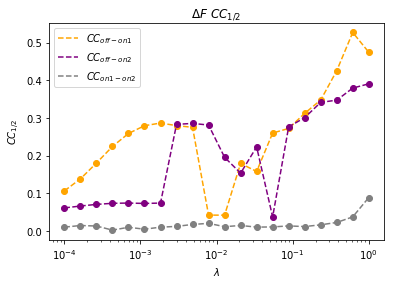

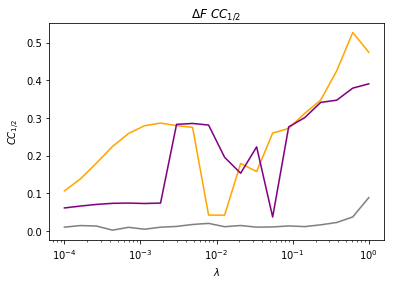

In [77]:
from scipy.stats import spearmanr,pearsonr

Ftrace = Ftrace_A.copy()
Ftrace = Ftrace_B.copy()
Ftrace = Ftrace_AB.copy()

rfunc = pearsonr
#rfunc = spearmanr


#Fmax_gamma = Ftrace[(Ftrace['RHO'] == r_) & (Ftrace['LAMBDA'] == l_) & (Ftrace['ITER'] == i_)]
#Imax_gamma = Icryst[(Icryst['RHO'] == r_) & (Icryst['LAMBDA'] == l_) & (Icryst['ITER'] == i_)]


cckey = "DeltaF"
r_DeltaF_replicates = Ftrace_A.groupby(['LAMBDA', 'ITER']).apply(lambda x: rfunc(x[cckey], x[cckey + '_2'])[0])
r_DeltaF = Ftrace_A.groupby(['LAMBDA', 'ITER']).apply(lambda x: rfunc(x[cckey], x[cckey + '_2'])[0]).groupby(['LAMBDA']).mean()
plt.plot(r_DeltaF.index.get_level_values('LAMBDA'), r_DeltaF, '--', color='orange', label='$CC_{off-on1}$')
plt.plot(r_DeltaF.index.get_level_values('LAMBDA'), r_DeltaF, 'o', color='orange')
r_DeltaF_replicates = Ftrace_B.groupby(['LAMBDA', 'ITER']).apply(lambda x: rfunc(x[cckey], x[cckey + '_2'])[0])
r_DeltaF = Ftrace_B.groupby(['LAMBDA', 'ITER']).apply(lambda x: rfunc(x[cckey], x[cckey + '_2'])[0]).groupby(['LAMBDA']).mean()
plt.plot(r_DeltaF.index.get_level_values('LAMBDA'), r_DeltaF, '--', color='purple', label='$CC_{off-on2}$')
plt.plot(r_DeltaF.index.get_level_values('LAMBDA'), r_DeltaF, 'o', color='purple')
r_DeltaF_replicates = Ftrace_AB.groupby(['LAMBDA', 'ITER']).apply(lambda x: rfunc(x[cckey], x[cckey + '_2'])[0])
r_DeltaF = Ftrace_AB.groupby(['LAMBDA', 'ITER']).apply(lambda x: rfunc(x[cckey], x[cckey + '_2'])[0]).groupby(['LAMBDA']).mean()
plt.plot(r_DeltaF.index.get_level_values('LAMBDA'), r_DeltaF, '--', color='grey', label='$CC_{on1-on2}$')
plt.plot(r_DeltaF.index.get_level_values('LAMBDA'), r_DeltaF, 'o', color='grey')
plt.semilogx()
plt.ylabel(r"$CC_{1/2}$")
plt.legend()
plt.gca().xaxis.tick_bottom()
plt.xlabel(r"$\lambda$")
plt.title("$\Delta F\ CC_{1/2}$")


#Best average lambda
r_DeltaF[r_DeltaF == r_DeltaF.max()]
print(f"Best average lambda = {r_DeltaF[r_DeltaF == r_DeltaF.max()].index[0]}")

#Best absolute iteration
l_,i_ = r_DeltaF_replicates[r_DeltaF_replicates == r_DeltaF_replicates.max()].index.values[0]
print("Lambda = {}".format(l_))

plt.figure()
cckey = "DeltaF"



r_DeltaF_replicates = Ftrace_A.groupby(['LAMBDA', 'ITER']).apply(lambda x: rfunc(x[cckey], x[cckey + '_2'])[0])
r_DeltaF = r_DeltaF_replicates.groupby(['LAMBDA']).median()
plt.fill_between(
    lambdas,
    r_DeltaF_replicates.groupby(['LAMBDA']).apply(lambda x: np.percentile(x,  10)),
    r_DeltaF_replicates.groupby(['LAMBDA']).apply(lambda x: np.percentile(x,  90)),
    color='orange',
    alpha=0.1
)
plt.plot(
    lambdas,
    r_DeltaF_replicates.groupby(['LAMBDA']).median(),
    '-',
    color='orange',
    label='$CC_{off-on1}$'
)

r_DeltaF_replicates = Ftrace_B.groupby(['LAMBDA', 'ITER']).apply(lambda x: rfunc(x[cckey], x[cckey + '_2'])[0])
r_DeltaF = r_DeltaF_replicates.groupby(['LAMBDA']).median()
plt.fill_between(
    lambdas,
    r_DeltaF_replicates.groupby(['LAMBDA']).apply(lambda x: np.percentile(x,  10)),
    r_DeltaF_replicates.groupby(['LAMBDA']).apply(lambda x: np.percentile(x,  90)),
    color='purple',
    alpha=0.1
)
plt.plot(
    lambdas,
    r_DeltaF_replicates.groupby(['LAMBDA']).median(),
    '-',
    color='purple',
    label='$CC_{off-on2}$'
)

r_DeltaF_replicates = Ftrace_AB.groupby(['LAMBDA', 'ITER']).apply(lambda x: rfunc(x[cckey], x[cckey + '_2'])[0])
r_DeltaF = r_DeltaF_replicates.groupby(['LAMBDA']).median()
plt.fill_between(
    lambdas,
    r_DeltaF_replicates.groupby(['LAMBDA']).apply(lambda x: np.percentile(x,  10)),
    r_DeltaF_replicates.groupby(['LAMBDA']).apply(lambda x: np.percentile(x,  90)),
    color='grey',
    alpha=0.1
)
plt.plot(
    lambdas,
    r_DeltaF_replicates.groupby(['LAMBDA']).median(),
    '-',
    color='grey',
    label='$CC_{on1-on2}$'
)


plt.semilogx()
plt.ylabel(r"$CC_{1/2}$")
plt.gca().xaxis.tick_bottom()
plt.xlabel(r"$\lambda$")
plt.title("$\Delta F\ CC_{1/2}$")



Fmax_DeltaF = Ftrace[(Ftrace['LAMBDA'] == l_) & (Ftrace['ITER'] == i_)]
Imax_DeltaF = Icryst[(Icryst['LAMBDA'] == l_) & (Icryst['ITER'] == i_)]

In [ ]:
f, ax1 = plt.subplots(1, 1, figsize=(10, 5))
_ = ax1.hist(100.*(Imax_DeltaF['Icryst'] - Imax_DeltaF['ipm2'])/Imax_DeltaF['ipm2'], 100, color='k', log=True)
ax1.set_xlabel("IPM2 %error")
ax1.set_title("Maximum  $\Delta F CC_{1/2}$")


In [ ]:
nbins = 15


df = Fmax_DeltaF.join(I.groupby(['MERGEDH', 'MERGEDK', 'MERGEDL']).first()['D'], ['H', 'K', 'L'])

cckey="DeltaF"
dbins = np.percentile(df['D'], np.linspace(0, 100, nbins+1))
dbins = np.vstack((dbins[:-1], dbins[1:])).T

Z = np.zeros(nbins)

for i in range(nbins):
    dmin,dmax = dbins[i]
    Z[i] = rfunc(df[(df['D'] > dmin) & (df['D'] < dmax)][cckey], 
                 df[(df['D'] > dmin) & (df['D'] < dmax)][cckey + '_2'],
                )[0]



f,(ax1,ax2,ax3,ax4)  = plt.subplots(4, 1, figsize=(7, 15))
#((ax_l1, ax_r1),(ax_l2, ax_r2),(ax_l3, ax_r3),(ax_l4, ax_r4)) = ax

plt.sca(ax1)
plt.plot(Z, 'k')
plt.ylabel(r"$\Delta F CC_{1/2}$")
plt.xticks(range(nbins), ['{:1.1f}-{:1.1f}'.format(i,j) for i,j in dbins], rotation=45)
plt.xlabel(r"$Resolution\ (\AA)$")

plt.sca(ax2)
x,y = df[cckey], df[cckey + '_2']
plt.title(r"Half Dataset $\Delta F$ Estimates")
plt.xlabel(r"$\Delta F_h$")
plt.ylabel(r"$\Delta F_h$")
plt.plot(x, y, 'ko', alpha =0.1)
i = np.argmax(Z)
dmin,dmax = dbins[i]
plt.plot(
    df[(df['D'] > dmin) & (df['D'] < dmax)][cckey], 
    df[(df['D'] > dmin) & (df['D'] < dmax)][cckey + '_2'],
    'ro', alpha=0.1,
)

plt.sca(ax3)
plt.title(r"Half Dataset {} Estimates".format(cckey))
plt.ylabel("$\Delta F$")
plt.xlabel(r"$F_{ref}$")
plt.plot(df[referencekey], x, 'ko', alpha =0.1)

plt.sca(ax4)
plt.plot(df['DeltaF'], np.sqrt(df['SIGMA(DeltaF)']), 'ko', alpha=0.1)
#plt.semilogy()
plt.xlabel("$\Delta F$")
plt.ylabel("$\sigma_{\Delta F}$")

plt.tight_layout()

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10))

plt.sca(ax1)
plt.plot(Ftrace.groupby('LAMBDA').std()['DeltaF'].index, 
         Ftrace.groupby('LAMBDA').std()['DeltaF'], 'ko')
plt.axhline(0., color='k', linestyle='--')
plt.ylabel("$\sigma_{\Delta F}$", size=16)
plt.semilogx()

plt.sca(ax2)
plt.plot(Ftrace.groupby('LAMBDA').mean()['DeltaF'].index, 
         Ftrace.groupby('LAMBDA').mean()['DeltaF'], 'ko')
plt.axhline(0., color='k', linestyle='--')
plt.xlabel("$\lambda$", size=16)
plt.ylabel("$\overline{\Delta F}$", size=16)
plt.semilogx()

plt.sca(ax3)
plt.plot(Ftrace.groupby('LAMBDA').mean()['DeltaF'].index, 
         Ftrace.groupby('LAMBDA').mean()['DeltaF']/Ftrace.groupby('LAMBDA').std()['DeltaF'], 
         'ko')
plt.axhline(0., color='k', linestyle='--')
plt.xlabel("$\lambda$", size=16)
plt.ylabel("$\overline{\Delta F} / \sigma_{\Delta F}$", size=16)
plt.semilogx()

plt.sca(ax4)
plt.plot(Ftrace.groupby('LAMBDA').mean()['DeltaF'].index, 
         Ftrace.groupby('LAMBDA').median()['DeltaF'], 
         'ko')
plt.axhline(0., color='k', linestyle='--')
plt.xlabel("$\lambda$", size=16)
plt.ylabel("$median {\Delta F}$", size=16)
plt.semilogx()

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
plt.sca(ax1)
plt.plot(Icryst.groupby('RHO').apply(lambda x: np.std((x['Icryst']-x['ipm2'])/x['Icryst'])).index,
         Icryst.groupby('RHO').apply(lambda x: np.std((x['Icryst']-x['ipm2'])/x['Icryst'])),
         'ko')
plt.semilogx()
plt.ylabel(r"Std Dev IPM2 Error (%)")

plt.sca(ax2)
plt.plot(Icryst.groupby('RHO').apply(lambda x: np.mean((x['Icryst']-x['ipm2'])/x['Icryst'])).index,
         Icryst.groupby('RHO').apply(lambda x: np.mean((x['Icryst']-x['ipm2'])/x['Icryst'])),
         'ko')
plt.semilogx()
plt.xlabel(r'$\rho$')
plt.ylabel(r"Mean Dev IPM2 Error (%)")



In [ ]:
_ = hist(Fmax_DeltaF['DeltaF'], 200, color='k')
plt.semilogy()